In [1]:
import sys
import os

# Get the absolute path to the project root (credit_fraud_detection/)
project_root = os.path.abspath(os.path.join('..'))
sys.path.append(project_root)  # Add project root to path

# Verify
print(f"Project root: {project_root}")
print(f"Python paths: {sys.path}")

Project root: /home/skillissue/Summer25/credit_fraud_detection
Python paths: ['/usr/lib64/python313.zip', '/usr/lib64/python3.13', '/usr/lib64/python3.13/lib-dynload', '', '/home/skillissue/.local/lib/python3.13/site-packages', '/usr/local/lib/python3.13/site-packages', '/usr/lib64/python3.13/site-packages', '/usr/lib/python3.13/site-packages', '/home/skillissue/Summer25/credit_fraud_detection']


In [2]:
# Import necessary libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from rich import print


In [3]:
# Use our custom modules
from src.data.data_loader import DataLoader
from src.models.model_factory import ModelFactory
from src.training.trainer import ModelTrainer
from src.training.evaluation import ModelEvaluator
from src.utils.logger import setup_logger


In [4]:
# Setup logging
logger = setup_logger(__name__)


In [5]:
print("Credit Card Fraud Detection - Refactored Implementation")
print("=" * 60)

Credit Card Fraud Detection - Refactored Implementation

============================================================

# =============================================================================
# 1. DATA LOADING AND EXPLORATION
# =============================================================================

In [6]:


print("\n1. LOADING AND EXPLORING DATA")
print("-" * 40)

# Initialize data loader
data_loader = DataLoader(config_path="../config/config.yaml")

# Load raw data
df_raw = data_loader.load_raw_data()

print(f"Dataset shape: {df_raw.shape}")
print(f"Dataset info:")
print(df_raw.info())

# Display first few rows
print("\nFirst 10 rows:")
print(df_raw.head(10))

# Check unique time values
print(f"\nUnique time values: {df_raw['Time'].nunique()}")

# Check for duplicates
duplicates = df_raw.duplicated().sum()
duplicate_percentage = (duplicates / len(df_raw)) * 100
print(f"Duplicates: {duplicates} ({duplicate_percentage:.2f}%)")

1. LOADING AND EXPLORING DATA

----------------------------------------

Dataset shape: (284807, 31)

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

None

First 10 rows:

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
6  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055  0.750137   
7 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
8  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592  0.373205   
9  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050 -0.069733   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  
5  0.105915  0.253844  0.081080    3.67      0  
6 -0.257237  0.034507  0.005168    4.99      0  
7 -0.051634 -1.206921 -1.085339   40.80      0  
8 -0.384157  0.011747  0.142404   93.20      0  
9  0.094199  0.246219  0.083076    3.68      0  

[10 rows x 31 columns]

Unique time values: 124592

Duplicates: 1081 (0.38%)

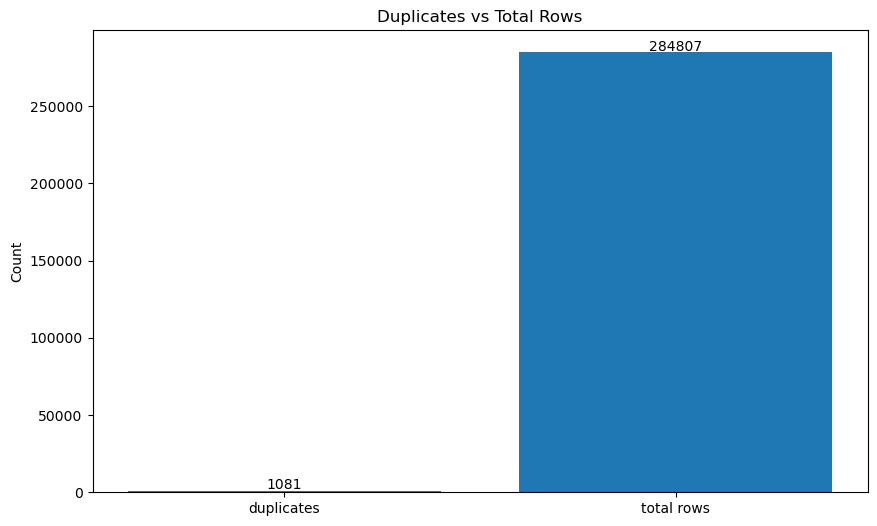

Class Distribution:

Fraud cases: 492

Normal cases: 284315

Fraud percentage: 0.173%

In [7]:
# Visualize duplicates
plt.figure(figsize=(10, 6))
vals = {"duplicates": duplicates, "total rows": len(df_raw)}
plt.bar(vals.keys(), vals.values())
plt.title("Duplicates vs Total Rows")
plt.ylabel("Count")
for i, (k, v) in enumerate(vals.items()):
    plt.text(i, v + 1000, str(v), ha='center')
plt.show()

# Check class distribution
fraud_count = df_raw["Class"].sum()
total_count = len(df_raw)
fraud_percentage = (fraud_count / total_count) * 100

print(f"\nClass Distribution:")
print(f"Fraud cases: {fraud_count}")
print(f"Normal cases: {total_count - fraud_count}")
print(f"Fraud percentage: {fraud_percentage:.3f}%")


# =============================================================================
# 2. EXPLORATORY DATA ANALYSIS
# =============================================================================


2. EXPLORATORY DATA ANALYSIS

----------------------------------------

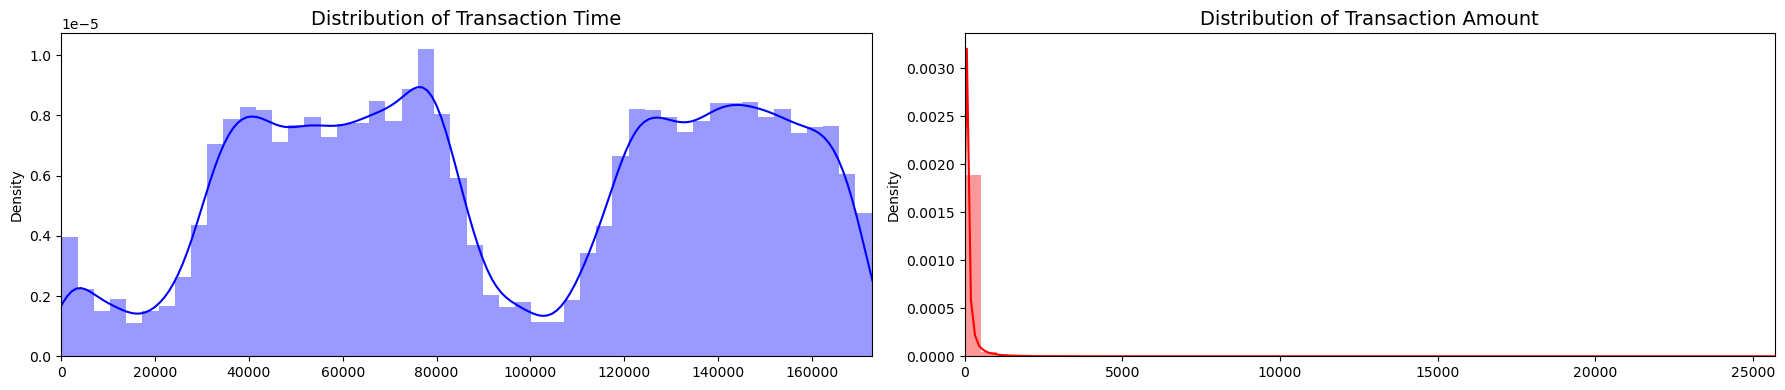

Observations:

- Amount feature is right-skewed (many small transactions)

- Time feature shows periodic patterns

In [8]:
print("\n2. EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# Distribution of key features
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Amount distribution
amount_val = df_raw['Amount'].values
sns.distplot(amount_val, ax=ax[1], color='r')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(amount_val), max(amount_val)])

# Time distribution
time_val = df_raw['Time'].values
sns.distplot(time_val, ax=ax[0], color='b')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(time_val), max(time_val)])

plt.tight_layout()
plt.show()
print("Observations:")
print("- Amount feature is right-skewed (many small transactions)")
print("- Time feature shows periodic patterns")



In [9]:
# Class distribution pie chart
d = df_raw['Class'].value_counts().reset_index(name='Count')
fig = px.pie(d, values='Count', names=['Not Fraud', 'Fraud'], hole=0.4, opacity=0.6,
            color_discrete_sequence=["#0B0A09", "#FF7676"])

fig.add_annotation(text='Highly Unbalanced Dataset<br>Requires Resampling',
                   x=1.2, y=0.9, showarrow=False, font_size=12, opacity=0.7)
fig.add_annotation(text='Class Distribution',
                   x=0.5, y=0.5, showarrow=False, font_size=14, opacity=0.7)

fig.update_layout(
    title=dict(text='Credit Card Fraud Detection - Class Distribution', x=0.47, y=0.98),
    legend=dict(x=0.37, y=-0.05, orientation='h'),
    hoverlabel=dict(bgcolor='white')
)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

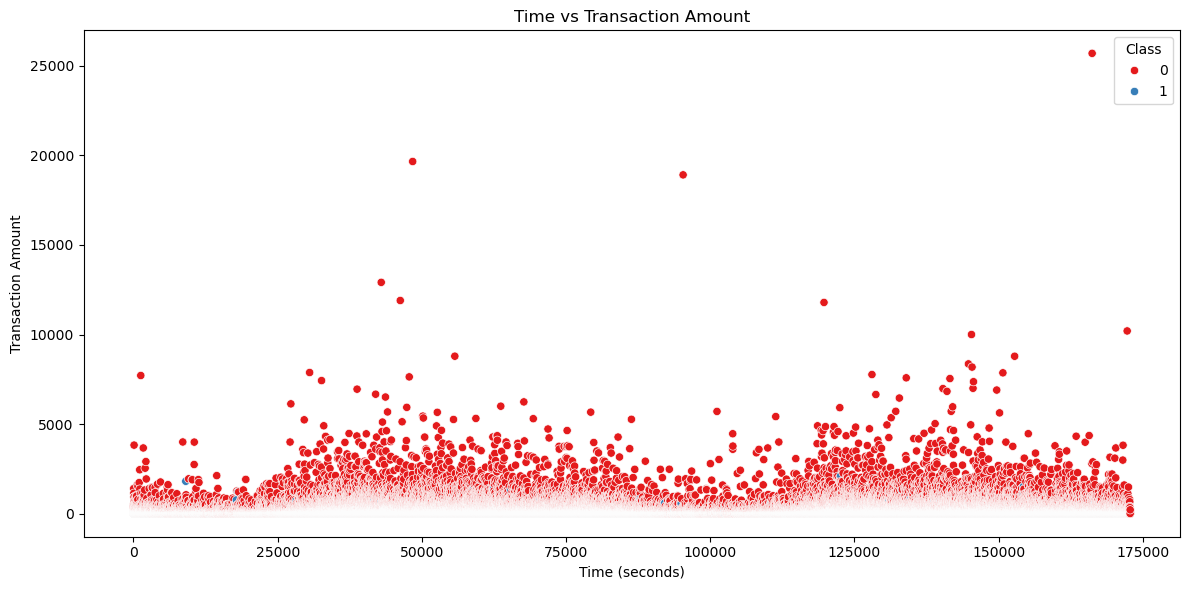

Observations from scatter plot:

- Legitimate transactions dominate (Class=0)

- Fraudulent transactions are scattered but may show patterns

- No strong linear relationship between time and amount

In [10]:
# Time vs Amount scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_raw, x='Time', y="Amount", hue="Class", palette="Set1")
plt.xlabel("Time (seconds)")
plt.title("Time vs Transaction Amount")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()

print("Observations from scatter plot:")
print("- Legitimate transactions dominate (Class=0)")
print("- Fraudulent transactions are scattered but may show patterns")
print("- No strong linear relationship between time and amount")

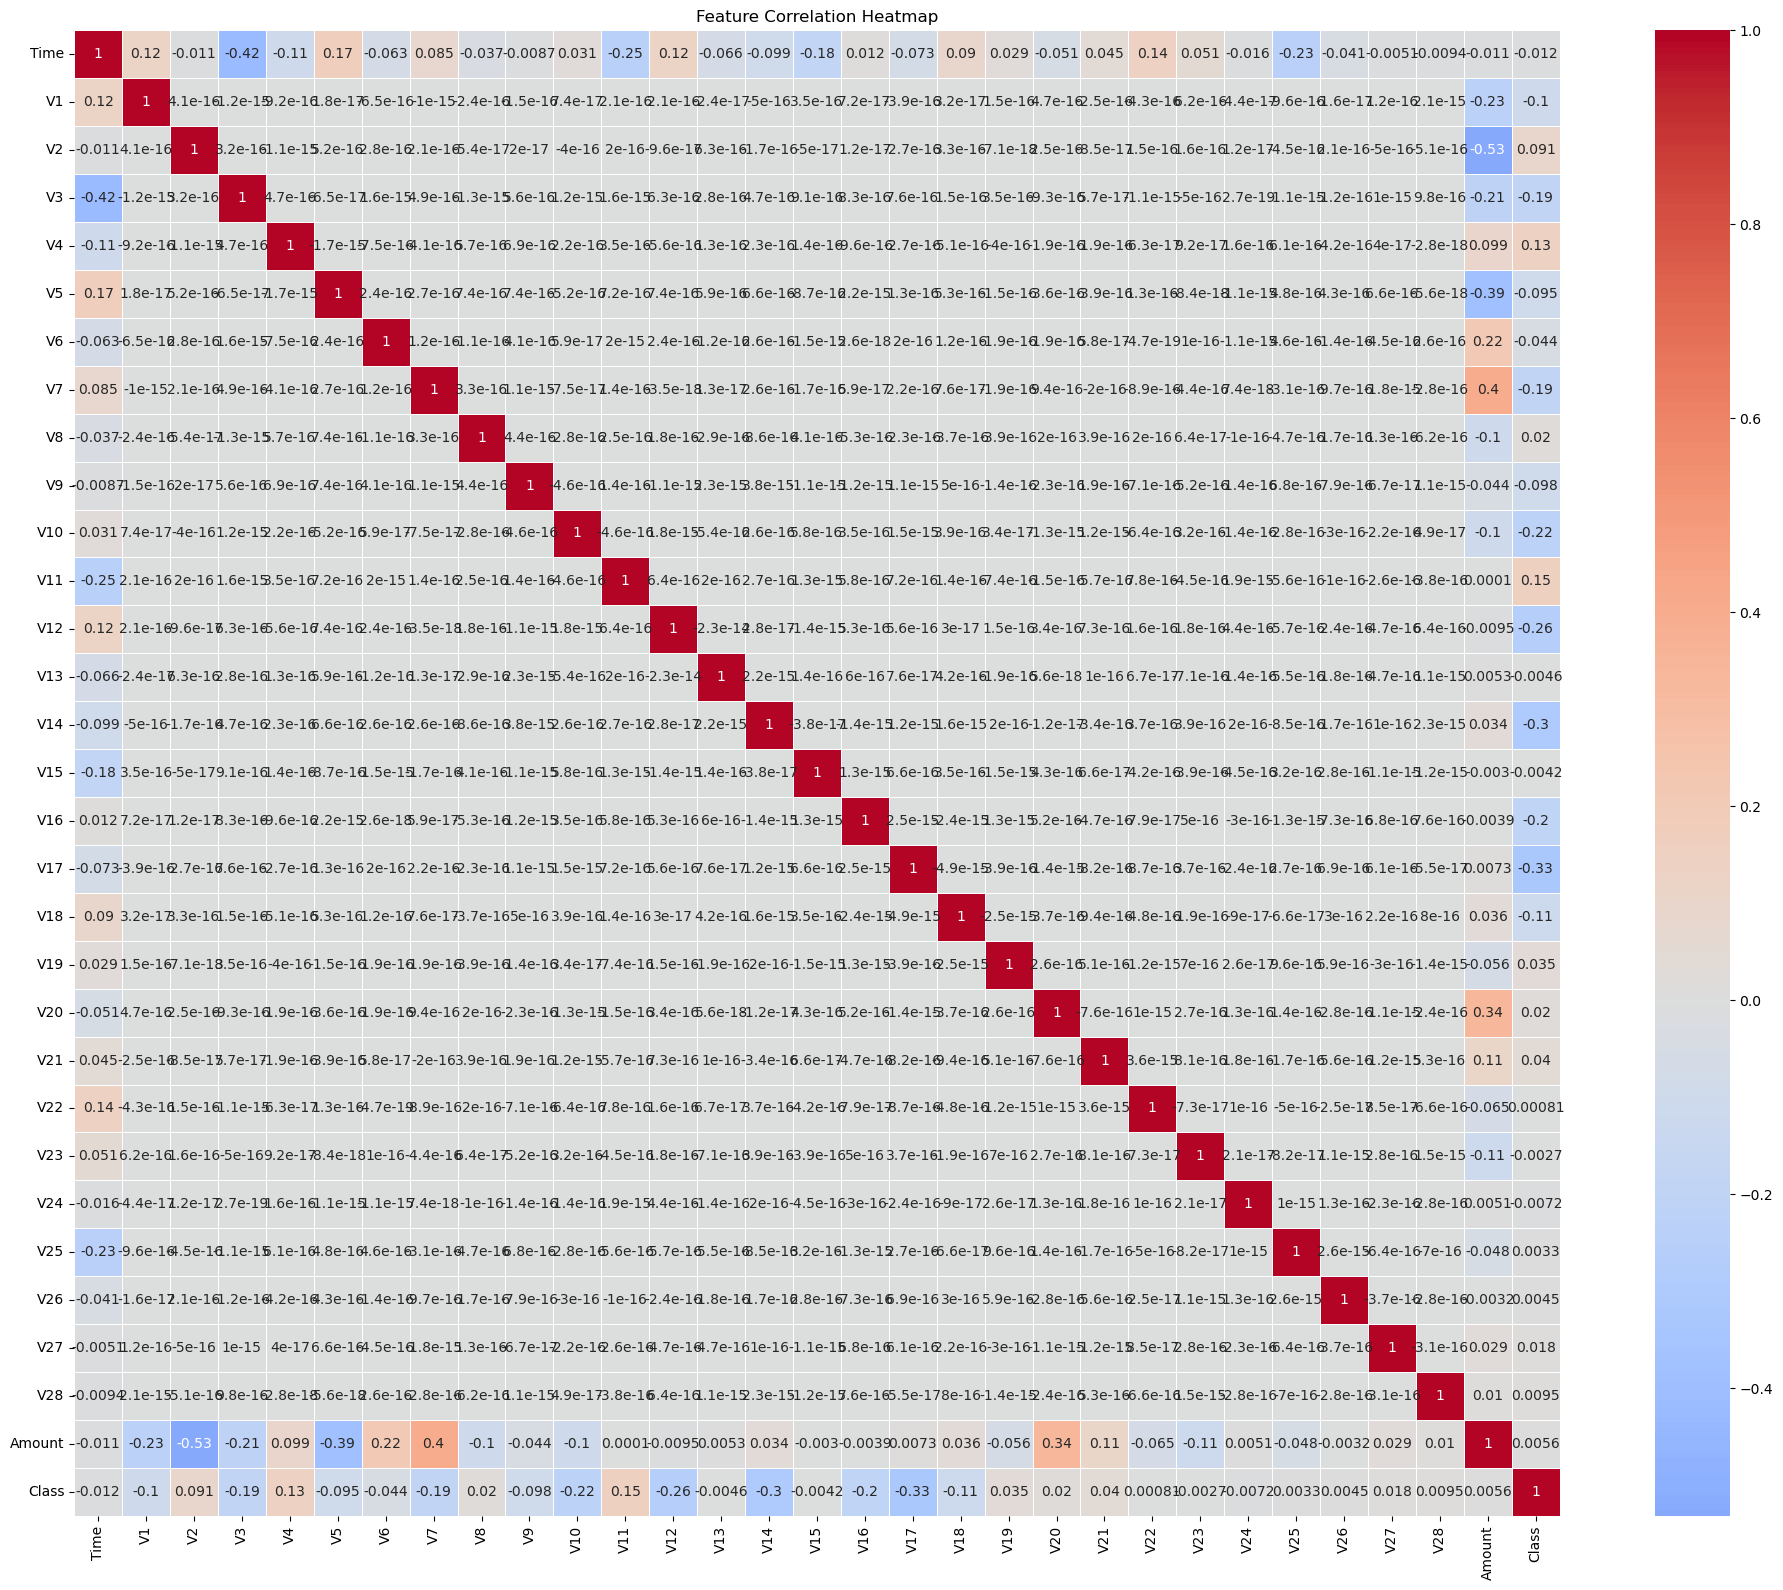

In [11]:
# Correlation heatmap
plt.figure(figsize=(20, 16))
correlation_matrix = df_raw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [12]:
# Features with strongest correlation to target
target_correlations = correlation_matrix['Class'].abs().sort_values(ascending=False)
print(f"\nTop 15 features correlated with Class:")
print(target_correlations.head(15))



Top 15 features correlated with Class:

Class    1.000000
V17      0.326481
V14      0.302544
V12      0.260593
V10      0.216883
V16      0.196539
V3       0.192961
V7       0.187257
V11      0.154876
V4       0.133447
V18      0.111485
V1       0.101347
V9       0.097733
V5       0.094974
V2       0.091289
Name: Class, dtype: float64

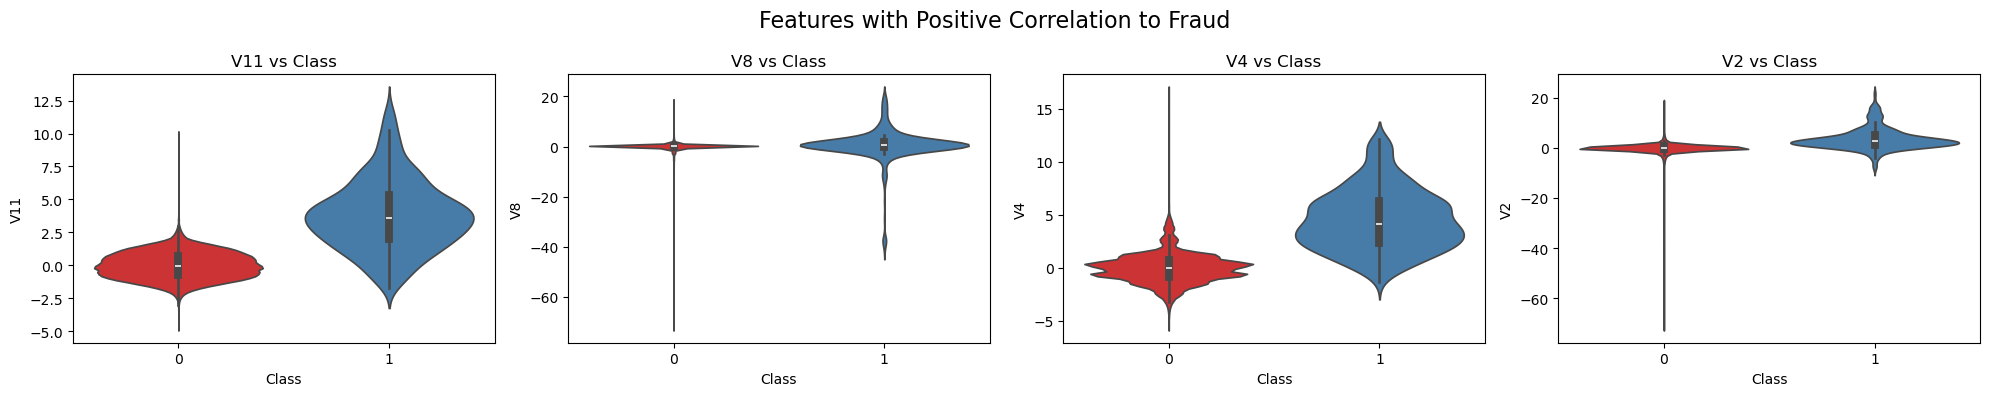

In [13]:
# Visualize positive correlations
f, axes = plt.subplots(ncols=4, figsize=(20, 4))
positive_corr_features = ['V11', 'V8', 'V4', 'V2']

for i, feature in enumerate(positive_corr_features):
    sns.violinplot(x="Class", y=feature, data=df_raw, palette='Set1', ax=axes[i])
    axes[i].set_title(f'{feature} vs Class')

plt.suptitle('Features with Positive Correlation to Fraud', fontsize=16)
plt.tight_layout()
plt.show()

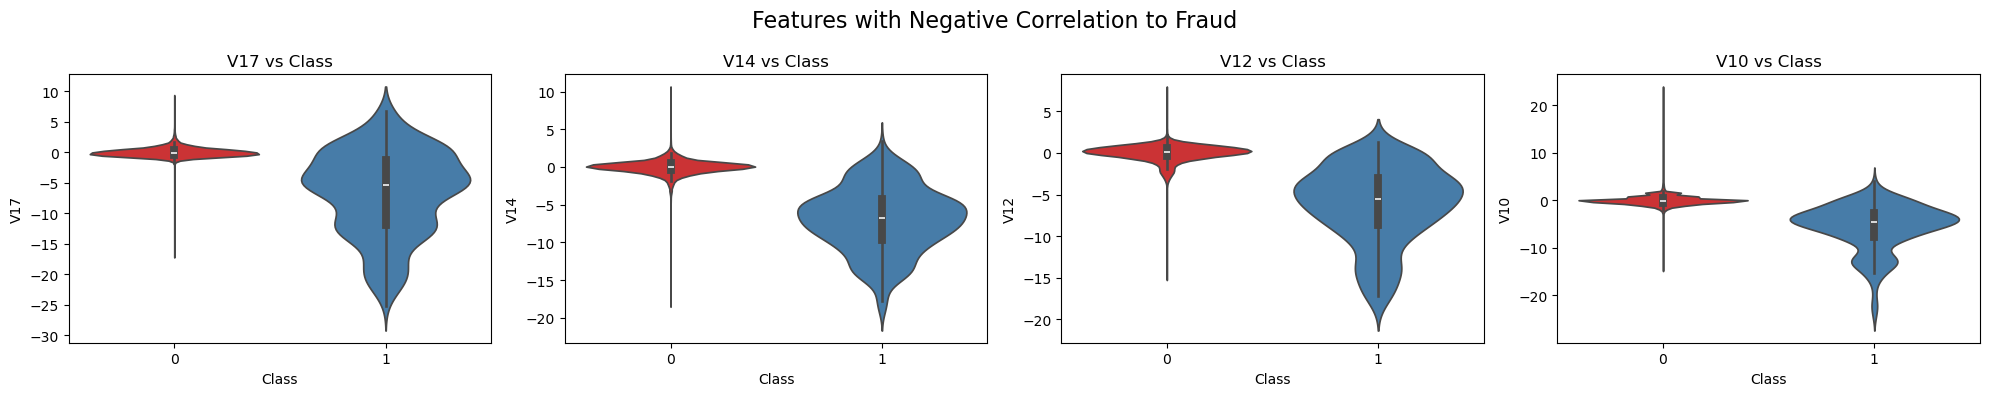

In [14]:
# Visualize negative correlations
f, axes = plt.subplots(ncols=4, figsize=(20, 4))
negative_corr_features = ['V17', 'V14', 'V12', 'V10']

for i, feature in enumerate(negative_corr_features):
    sns.violinplot(x="Class", y=feature, data=df_raw, palette='Set1', ax=axes[i])
    axes[i].set_title(f'{feature} vs Class')

plt.suptitle('Features with Negative Correlation to Fraud', fontsize=16)
plt.tight_layout()
plt.show()

# =============================================================================
# 3. DATA PREPROCESSING
# =============================================================================


In [15]:

print("\n3. DATA PREPROCESSING")
print("-" * 40)

# Clean and preprocess data using our DataLoader
df_cleaned = data_loader.clean_data(df_raw.copy())
df_scaled = data_loader.scale_features(df_cleaned)

print("Data preprocessing completed:")
print(f"- Removed {duplicates} duplicate rows")
print(f"- Scaled Amount and Time features using RobustScaler")
print(f"- Final dataset shape: {df_scaled.shape}")


3. DATA PREPROCESSING

----------------------------------------

Data preprocessing completed:

- Removed 1081 duplicate rows

- Scaled Amount and Time features using RobustScaler

- Final dataset shape: (283726, 31)

In [16]:
# Show scaled features
print("\nScaled Amount and Time features:")
print(df_scaled[["Amount", "Time"]].head())


Scaled Amount and Time features:

Amount      Time
0  1.774718 -0.995290
1 -0.268530 -0.995290
2  4.959811 -0.995279
3  1.411487 -0.995279
4  0.667362 -0.995267

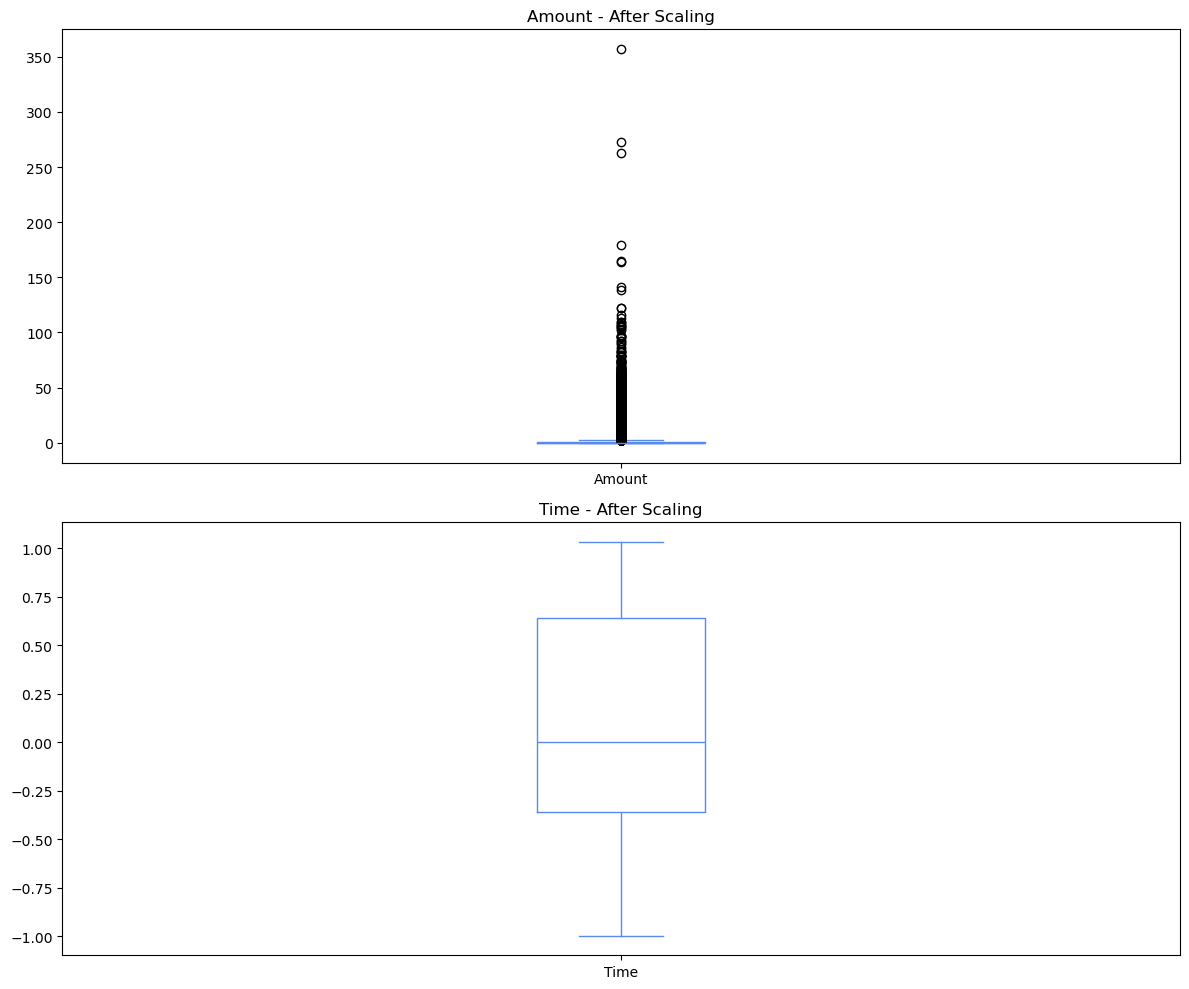

In [17]:
# Check for outliers after scaling
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
df_scaled[['Amount']].plot(kind='box', ax=axes[0], color="#578BEC")
axes[0].set_title('Amount - After Scaling')

df_scaled[['Time']].plot(kind='box', ax=axes[1], color="#578BEC")
axes[1].set_title('Time - After Scaling')

plt.tight_layout()
plt.show()

In [18]:
# Prepare features and target
X, y = data_loader.prepare_features_target(df_scaled)
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (283726, 30)

Target shape: (283726,)

In [19]:
# Balance the dataset
X_balanced, y_balanced = data_loader.balance_dataset(X, y) #TODO add strategies for data balancing (smote, nearmiss... you call it) using the strategy pattern
print(f"\nAfter balancing:")
print(f"Features shape: {X_balanced.shape}")
print(f"Target shape: {y_balanced.shape}")
print(f"Class distribution: {y_balanced.value_counts().to_dict()}")


After balancing:

Features shape: (946, 30)

Target shape: (946,)

Class distribution: {1: 473, 0: 473}

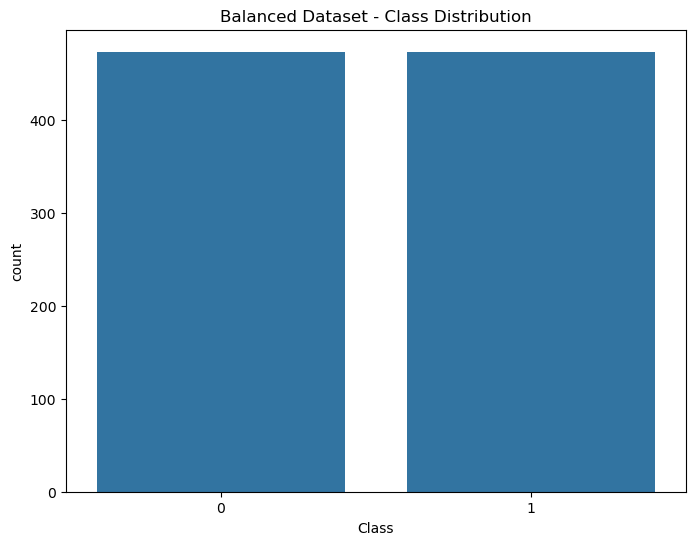

In [20]:
# Visualize balanced dataset
plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'Class': y_balanced}), x='Class')
plt.title("Balanced Dataset - Class Distribution")
plt.show()

In [21]:
# Split the data
X_train, X_test, y_train, y_test = data_loader.split_data(X_balanced, y_balanced)
print(f"\nTrain/Test Split:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

Train/Test Split:

X_train: (756, 30), y_train: (756,)

X_test: (190, 30), y_test: (190,)

# =============================================================================
# 4. MODEL TRAINING AND EVALUATION
# =============================================================================


In [22]:
print("\n4. MODEL TRAINING AND EVALUATION")
print("-" * 40)

# Initialize trainer and evaluator
trainer = ModelTrainer()
evaluator = ModelEvaluator(trainer.config)

4. MODEL TRAINING AND EVALUATION

----------------------------------------

Project root: /home/skillissue/Summer25/credit_fraud_detection
Looking for config at: /home/skillissue/Summer25/credit_fraud_detection/config/config.yaml


In [23]:
# Train individual models, as a good software engineer this time
print("\n4.1 Training Individual Models")
print("-" * 30)


4.1 Training Individual Models

------------------------------

In [24]:
# Logistic Regression
print("Training Logistic Regression...")
lr_model, lr_metrics = trainer.train_single_model('logistic_regression', X_train, y_train, X_test, y_test)
print(f"Logistic Regression Results: {lr_metrics}")

Training Logistic Regression...

Logistic Regression Results: {'accuracy': 0.9526315789473684, 'f1_weighted': 0.9525671964716651, 'precision': 
0.955102495543672, 'recall': 0.9526315789473684, 'roc_auc': np.float64(0.9821606648199446)}

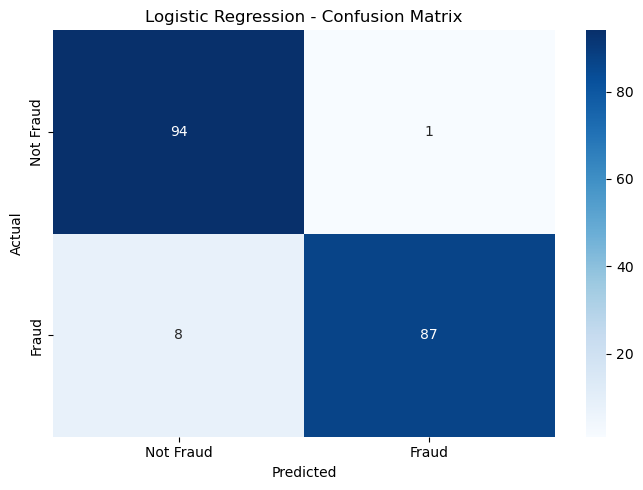

In [25]:
# Plot confusion matrix for Logistic Regression
y_pred_lr = lr_model.predict(X_test)
evaluator.plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
plt.show()


In [26]:
# Classification report (if i want to)
lr_report = evaluator.generate_classification_report(y_test, y_pred_lr, "Logistic Regression")
print(lr_report)

precision    recall  f1-score   support

   Not Fraud       0.92      0.99      0.95        95
       Fraud       0.99      0.92      0.95        95

    accuracy                           0.95       190
   macro avg       0.96      0.95      0.95       190
weighted avg       0.96      0.95      0.95       190

Training MLP Neural Network...

MLP Results: {'accuracy': 0.9578947368421052, 'f1_weighted': 0.9578900709219857, 'precision': 0.9580977718656467, 
'recall': 0.9578947368421052, 'roc_auc': np.float64(0.9818282548476455)}

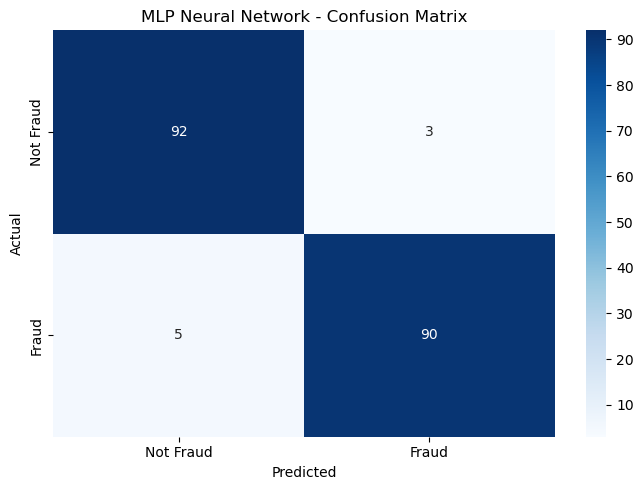

In [27]:
# MLP Neural Network
print("\nTraining MLP Neural Network...")
mlp_model, mlp_metrics = trainer.train_single_model('mlp', X_train, y_train, X_test, y_test)
print(f"MLP Results: {mlp_metrics}")

# Plot confusion matrix for MLP
y_pred_mlp = mlp_model.predict(X_test)
evaluator.plot_confusion_matrix(y_test, y_pred_mlp, "MLP Neural Network")
plt.show()

In [28]:
# XGBoost
print("\nTraining XGBoost...")
xgb_model, xgb_metrics = trainer.train_single_model('xgboost', X_train, y_train, X_test, y_test)
print(f"XGBoost Results: {xgb_metrics}")

Training XGBoost...

XGBoost Results: {'accuracy': 0.9631578947368421, 'f1_weighted': 0.9631487074339863, 'precision': 
0.963620230700976, 'recall': 0.9631578947368421, 'roc_auc': np.float64(0.9890304709141273)}

# =============================================================================
# 5. CROSS-VALIDATION COMPARISON
# =============================================================================


In [29]:

print("\n5. CROSS-VALIDATION COMPARISON")
print("-" * 40)
# K-fold cross-validation as in notebook
cv_results = trainer.train_with_kfold_comparison(X_balanced, y_balanced)
print("\nK-Fold Cross-Validation Results:")
print(cv_results) #TODO batch this

5. CROSS-VALIDATION COMPARISON

----------------------------------------

Error training LogisticRegression: 'ModelWrapper' object has no attribute 'model_name'
Error training KNearest: 'ModelWrapper' object has no attribute 'model_name'
Error training Support Vector Classifier: 'ModelWrapper' object has no attribute 'model_name'
Error training DecisionTreeClassifier: 'ModelWrapper' object has no attribute 'model_name'
Error training XGBClassifier: 'ModelWrapper' object has no attribute 'model_name'
No models were successfully evaluated.


K-Fold Cross-Validation Results:

Empty DataFrame
Columns: [model, cv_score, cv_std]
Index: []

In [30]:
# Ensemble models comparison
print("\nEnsemble Models Comparison:")
ensemble_results = trainer.train_ensemble_models(X_balanced, y_balanced)
print(ensemble_results)

Ensemble Models Comparison:

model  cv_score    cv_std
4      RandomForestClassifier  0.933356  0.022888
0          AdaBoostClassifier  0.930198  0.021330
2  GradientBoostingClassifier  0.929140  0.018582
1           BaggingClassifier  0.918591  0.009908
3         ExtraTreeClassifier  0.887920  0.020585

# =============================================================================
# 6. ROC CURVE COMPARISON
# =============================================================================


6. ROC CURVE COMPARISON

----------------------------------------

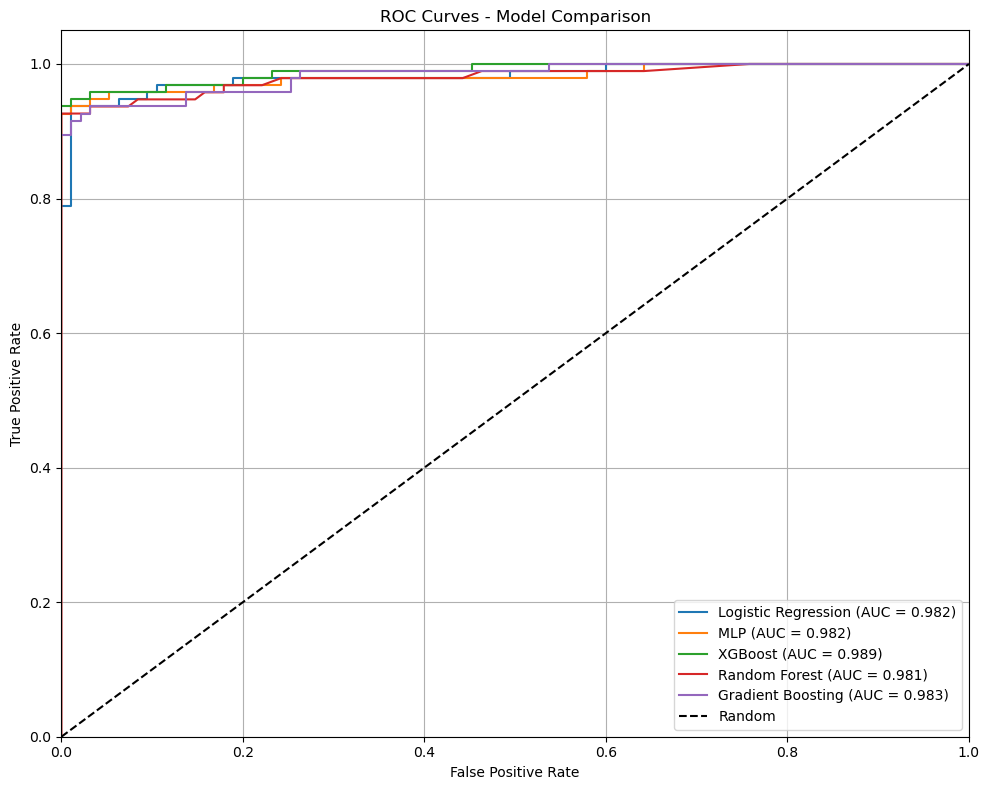

In [31]:

print("\n6. ROC CURVE COMPARISON")
print("-" * 40)

# Train multiple models for ROC comparison
models_for_roc = {
    'Logistic Regression': lr_model,
    'MLP': mlp_model,
    'XGBoost': xgb_model
}

# Add more models
try:
    rf_model, _ = trainer.train_single_model('random_forest', X_train, y_train, X_test, y_test)
    models_for_roc['Random Forest'] = rf_model
except:
    pass

try:
    gb_model, _ = trainer.train_single_model('gradient_boosting', X_train, y_train, X_test, y_test)
    models_for_roc['Gradient Boosting'] = gb_model
except:
    pass

# Plot ROC curves
evaluator.plot_roc_curve(models_for_roc, X_test, y_test)
plt.show()

# =============================================================================
# 7. HYPERPARAMETER TUNING
# =============================================================================

In [32]:


print("\n7. HYPERPARAMETER TUNING")
print("-" * 40)

# Perform grid search as in notebook
grid_search_results = trainer.perform_grid_search_comparison(X_train, y_train)
print("\nGrid Search Results:")
print(grid_search_results)

7. HYPERPARAMETER TUNING

----------------------------------------

Grid Search Results:

model  best_score  \
1                   svm    0.939177   
0   logistic_regression    0.933897   
3         random_forest    0.929906   
5   k_nearest_neighbors    0.925959   
2         decision_tree    0.908757   
4  naive_bayes_gaussian    0.908731   

                                     best_params  
1                  {'C': 15, 'kernel': 'linear'}  
0                        {'solver': 'liblinear'}  
3  {'criterion': 'entropy', 'n_estimators': 100}  
5                             {'n_neighbors': 5}  
2                       {'criterion': 'entropy'}  
4                                             {}

# =============================================================================
# 8. MODEL COMPARISON AND FINAL RESULTS
# =============================================================================


In [33]:

print("\n8. FINAL MODEL COMPARISON")
print("-" * 40)

# Train all major models
model_types = ['logistic_regression', 'xgboost', 'mlp', 'random_forest', 'svm', 'decision_tree']
all_results = trainer.train_multiple_models(model_types, X_train, y_train, X_test, y_test)

8. FINAL MODEL COMPARISON

----------------------------------------

In [34]:
# Compare models
comparison_df = evaluator.compare_models(all_results)
print("\nFinal Model Comparison:")
print(comparison_df)

Final Model Comparison:

accuracy  f1_weighted  precision  recall  roc_auc
xgboost                0.9632       0.9631     0.9636  0.9632   0.9890
mlp                    0.9579       0.9579     0.9581  0.9579   0.9818
logistic_regression    0.9526       0.9526     0.9551  0.9526   0.9822
svm                    0.9526       0.9526     0.9551  0.9526   0.9834
random_forest          0.9474       0.9473     0.9482  0.9474   0.9808
decision_tree          0.9316       0.9316     0.9316  0.9316   0.9316

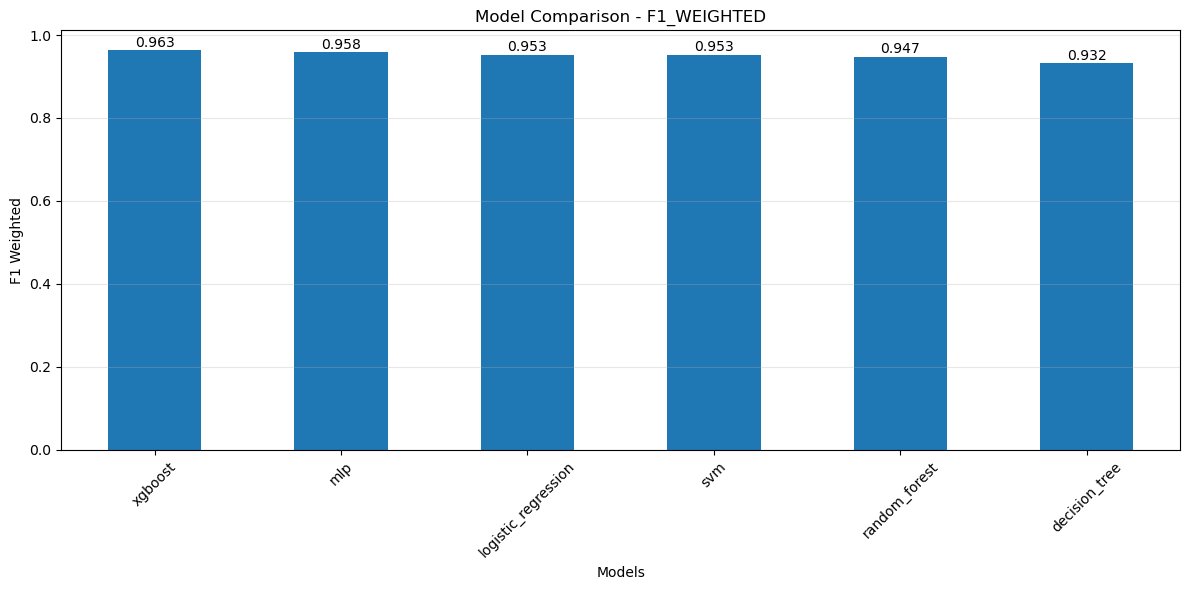

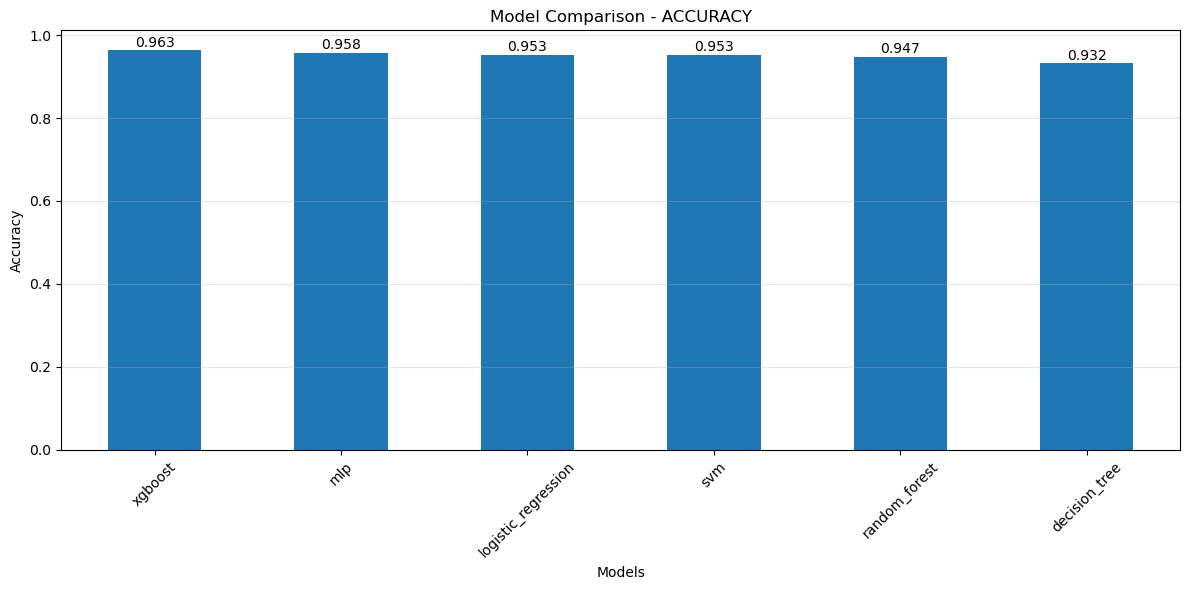

In [35]:
# Plot model comparison
evaluator.plot_model_comparison(comparison_df, 'f1_weighted')
plt.show()

evaluator.plot_model_comparison(comparison_df, 'accuracy')
plt.show()

In [36]:
# Get best model
best_model_name, best_model = trainer.get_best_model('f1_weighted')
print(f"\nBest Model: {best_model_name}")

Best Model: xgboost

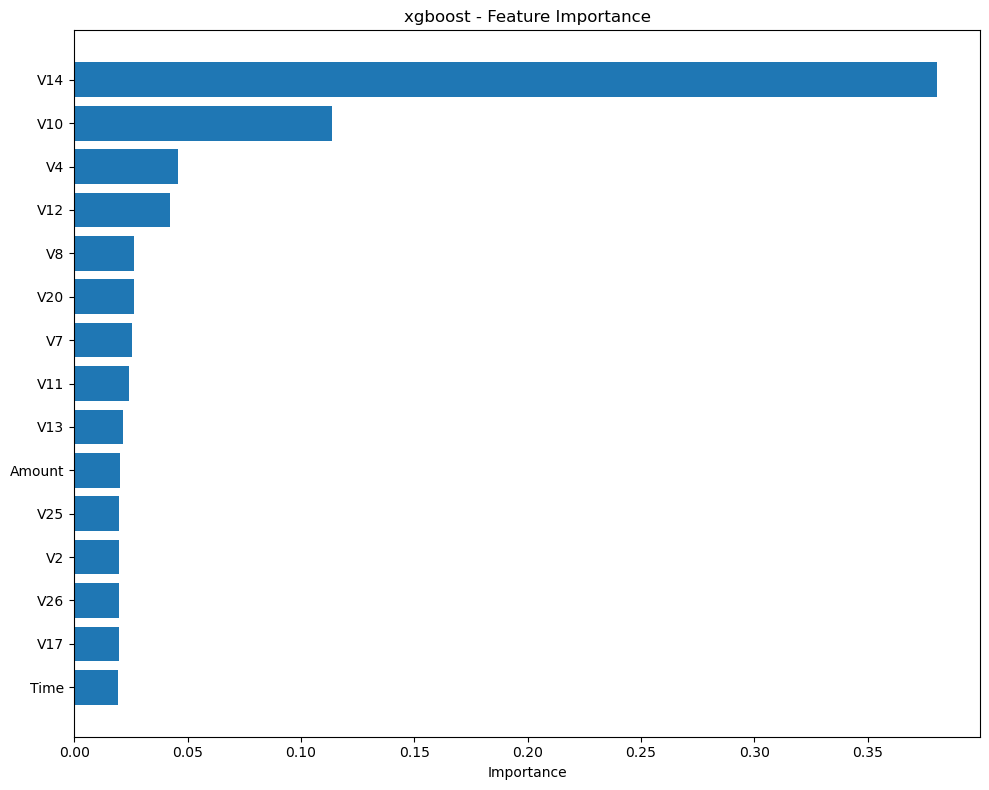

In [37]:
# Feature importance for best model (if available)
try:
    feature_names = X_train.columns.tolist()
    importance_df = evaluator.evaluate_feature_importance(best_model, feature_names)
    
    if not importance_df.empty:
        evaluator.plot_feature_importance(importance_df, best_model_name)
        plt.show()
except:
    print("Feature importance not available for the best model")

# =============================================================================
# 9. SAVE RESULTS
# =============================================================================


In [38]:

print("\n9. SAVING RESULTS")
print("-" * 40)

# Save processed data
data_loader.save_processed_data(X_train, X_test, y_train, y_test)

# Save trained models
trainer.save_trained_models()

# Save evaluation results
evaluator.save_evaluation_results(all_results, 'evaluation_results.json')

print("\nProject completed successfully!")
print("All models trained, evaluated, and saved.")
print(f"Best performing model: {best_model_name}")
print(f"Best F1-weighted score: {all_results[best_model_name]['f1_weighted']:.4f}")

9. SAVING RESULTS

----------------------------------------

Project completed successfully!

All models trained, evaluated, and saved.

Best performing model: xgboost

Best F1-weighted score: 0.9631

# =============================================================================
# 10. SUMMARY STATISTICS
# =============================================================================

In [39]:


print("\n10. SUMMARY STATISTICS")
print("-" * 40)

summary_stats = {
    'Original Dataset Size': len(df_raw),
    'After Cleaning': len(df_cleaned),
    'After Balancing': len(X_balanced),
    'Training Set Size': len(X_train),
    'Test Set Size': len(X_test),
    'Number of Features': X_train.shape[1],
    'Models Trained': len(all_results),
    'Best Model': best_model_name,
    'Best F1 Score': f"{all_results[best_model_name]['f1_weighted']:.4f}"
}

for key, value in summary_stats.items():
    print(f"{key}: {value}")

print("\n" + "="*60)
print("CREDIT CARD FRAUD DETECTION PROJECT COMPLETED")
print("="*60)

10. SUMMARY STATISTICS

----------------------------------------

Original Dataset Size: 284807

After Cleaning: 283726

After Balancing: 946

Training Set Size: 756

Test Set Size: 190

Number of Features: 30

Models Trained: 6

Best Model: xgboost

Best F1 Score: 0.9631

============================================================

CREDIT CARD FRAUD DETECTION PROJECT COMPLETED

============================================================